# Classification: Benign and Malignant Tumors

## Importando librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

## Lectura de archivo

In [2]:
df = pd.read_csv('cancer.csv')

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.isnull().sum()
# No existen valores nulos en los datos (Unnamed:32 es eliminado de la data, pues no cuenta con ningún valor)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Separación de datos de entrada (X) y salida (y)

In [6]:
X = df.iloc[:,2:-1]

In [7]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
y = df['diagnosis']

In [9]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

## Preprocesamiento de datos

#### Separación de muestras para Train y Test

In [10]:
df.shape

(569, 33)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
X_train.shape

(398, 30)

In [13]:
X_test.shape

(171, 30)

#### Balanceo de datos

In [14]:
rus = RandomUnderSampler(random_state=0)

In [15]:
X_train_balanced, y_train_balanced = rus.fit_resample(X_train, y_train)

In [16]:
X_train.shape

(398, 30)

In [17]:
X_train_balanced.shape

(298, 30)

In [18]:
y_train.value_counts()

B    249
M    149
Name: diagnosis, dtype: int64

In [19]:
y_train_balanced.value_counts()

M    149
B    149
Name: diagnosis, dtype: int64

Los datos de entrenamiento se encuentran balanceados por medio de Undersampling, reduciendo la cantidad de muestras benignos de 249 a 149. El total de datos para el entrenamiento por lo tanto será de 298, y las nuevas variables a utilizar serán `X_train_balanced` y `y_train_balanced`

#### Normalización de datos

In [20]:
scaler = StandardScaler()

In [21]:
Xnorm = scaler.fit_transform(X_train_balanced)

In [22]:
Xnorm.shape

(298, 30)

#### Reducción de dimensionalidad

In [23]:
varianza = []
for i in range(1,11):
    pca = PCA(n_components=i)
    pca.fit(Xnorm)
    varianza.append(pca.explained_variance_ratio_.sum())

In [24]:
varianzadf = pd.DataFrame({'componentes':np.arange(1,11),'varianza':varianza})

In [25]:
varianzadf

,componentes,varianza
0,1,0.431078
1,2,0.629930
2,3,0.731367
3,4,0.797219
4,5,0.844470
5,6,0.888850
6,7,0.912518
7,8,0.929564
8,9,0.942701
9,10,0.954429


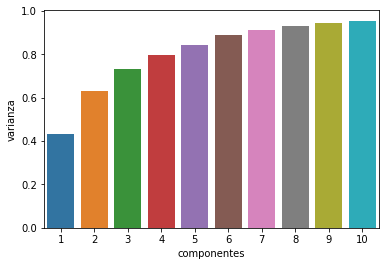

In [26]:
_=sns.barplot(x='componentes',y='varianza', data=varianzadf)

In [27]:
pca = PCA(n_components=10)
pca.fit(Xnorm)

PCA(n_components=10)

In [28]:
pca.explained_variance_ratio_

array([0.43107785, 0.19885181, 0.1014374 , 0.06585242, 0.04725068,
       0.04437948, 0.02366887, 0.01704561, 0.0131365 , 0.01172796])

In [29]:
Xpca = pca.transform(Xnorm)

El número de columnas ahora se encuentra reducido de 30 a 10 

In [30]:
Xnorm.shape

(298, 30)

In [31]:
Xpca.shape

(298, 10)

## Entrenamiento Random Forest

#### Búsqueda de hiperparámetros del modelo

In [32]:
rfc = RandomForestClassifier(random_state=0)

In [33]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt','log2'],
    'max_depth': [10,50,100],
    'criterion': ['gini','entropy']
}

In [34]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

In [35]:
CV_rfc.fit(Xpca, y_train_balanced)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 100],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]})

In [36]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 100}

#### Entrenamiento con mejores hiperparámetros

In [37]:
clf = RandomForestClassifier(criterion='entropy',max_depth=10,max_features='sqrt',n_estimators=100,random_state=0)

In [38]:
clf.fit(Xpca, y_train_balanced)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       random_state=0)

#### Predicción de datos

In [39]:
Xnorm_test = scaler.transform(X_test)

In [40]:
Xpca_test = pca.transform(Xnorm_test)

In [41]:
y_pred = clf.predict(Xpca_test)

In [42]:
y_pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M'], dtype=object)

#### Matriz de confusión

In [43]:
cf_matrix = confusion_matrix(y_test, y_pred)

In [44]:
cf_matrix

array([[103,   5],
       [  3,  60]], dtype=int64)

In [45]:
y_test.value_counts()

B    108
M     63
Name: diagnosis, dtype: int64

In [46]:
clf.score(Xpca_test,y_test)

0.9532163742690059

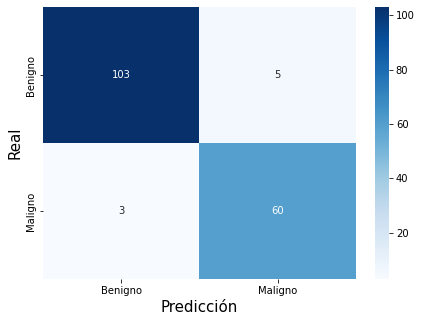

In [47]:
labels = ['Benigno','Maligno']
fig,ax = plt.subplots(figsize=(7,5))
_=sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
_=ax.set_xlabel("Predicción", fontsize = 15)
_=ax.set_ylabel("Real", fontsize = 15)

Casos totales en el Test
- Benignos: 108
- Malignos: 63

La matriz de confusión muestra que 103 casos `benignos` fueron predichos de forma correcta, sin embargo 5 fueron de marcados como `malignos`, estos son falsos positivos.

Por el otro lado, se tiene una predicción de 3 casos `benignos` cuando en realidad son `malignos`, estos falsos negativos perjudicando más en los pacientes al tener este margen de error y no informar que sus casos en realidad son malignos.

El porcentaje de exactitud obtenido por medio de este modelo Random Forest es de 95.32%, a diferencia de otros modelos realizados como Logistic Regression que generaba un 99,42% y Decision Tree con un 94.74%.
- Este modelo mejoró a comparación de un único Decision Tree, pero es más bajo que en que el modelo Logistic Regression

## Análisis de importancia de características para la predicción

##### Imbalanced Classification
Previo al entrenamiento del modelo, se realiza un preprocesamiento de los datos, analizando los datos nulos, revisando tipos de datos, entre otros. Adicional, es importante mantener la data balanceada, es decir, que la salida (y) del entrenamiento se reduzca el número de samples, con el fin de obtener la misma cantidad de datos de cada una de las clases.

Dado que se requiere analizar a detalle los casos `malignos`, entonces se reduce la cantidad de datos para la clase de `benignos`, por lo que se realiza un algoritmo de Undersampling.

##### GridSearchCV - Cross Validation
Al modelo pueden especificarse algunos parámetros para el entrenamiento, sin embargo, diferentes valores pueden afectar en el resultado y rendimiento del modelo, por lo que es importante conocer cuales son los mejores hiperparámetros que se puede obtener con GridSearchCV, donde se genera un Cross Validation provando diferente combinaciones de parámetros hasta el mejor que se adapte, y usar los obtenidos para mejores resultados.

##### Resultado de Random Forest
El modelo de clasificación Random Forest realiza diferentes combinaciones de Decision Tree, que define la salida de predicción por la decisión que más se repita en todos los árboles, lo que llegó a ser menos exacto que Logistic Regression. 

Esta es la razón por la que diferentes modelos son probados para el entrenamiento, en este caso, las decisiones de cada árbol no generaron una salida más eficiente que el otro modelo, no se ajustaron a ellos. Por último, realizar el análisis por medio de Random Forest no mejora la salida, un sistema más "complejo", no da indicios de mejores resultados.